# 1. Знакомимся с данными

✍ Вы уже умеете присоединять строки друг к другу путём добавления столбцов «сбоку» — с помощью различных видов JOIN.

?
А что если нам необходимо присоединить несколько результатов «снизу», так, чтобы получить общий результат в выводе?

Ответу на этот вопрос и посвящён текущий модуль.

Обратите внимание! Вы можете посмотреть подробный разбор структуры предлагаемых запросов во вкладке Детализация.

Но прежде, как всегда, разберёмся с датасетом ↓

В данном блоке мы будем работать с данными о компании, организующей перевозки грузов.

Интересующие нас данные хранятся в таблицах city, customer, driver, shipment, truck. Давайте внимательно их изучим.

Ниже представлена ER-диаграмма (от англ. entity-relation, дословно — «сущность-связь»), которая отображает существующие связи между отдельными таблицами.

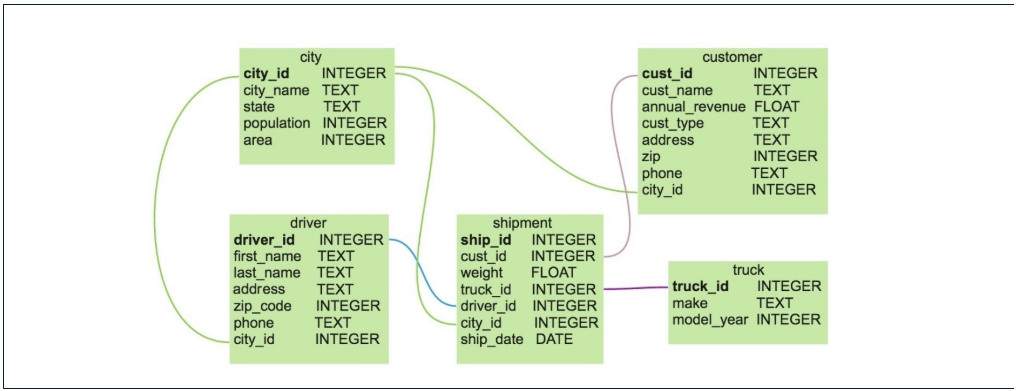

Таблица city — это справочник городов. Структура справочника представлена ниже.

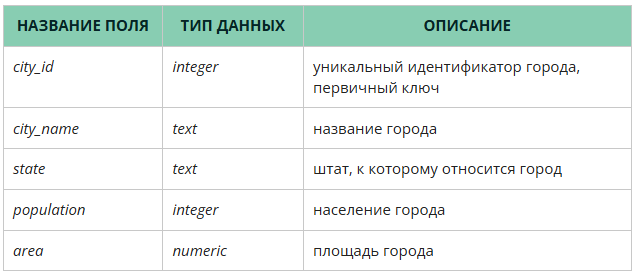

Таблица customer — это справочник клиентов. У компании, с данными которой мы работаем, только корпоративные клиенты, поэтому в таблице нет привычных данных о возрасте и поле. Справочник содержит следующие поля:

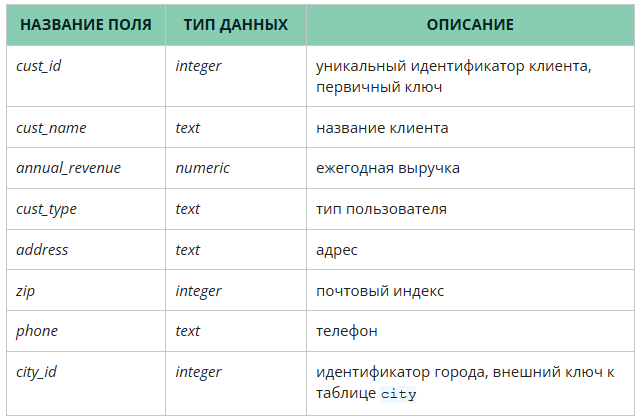

Следующая таблица — driver — справочник водителей. Перечень сведений, содержащихся в таблице, представлен ниже.

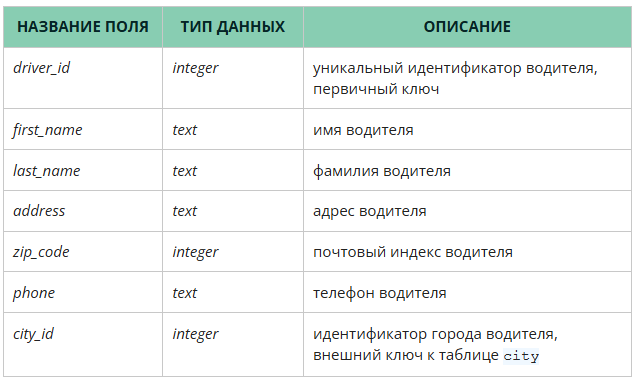

В таблице truck хранится информация о грузовиках, на которых осуществляются перевозки. Данные о них представлены в следующем виде:

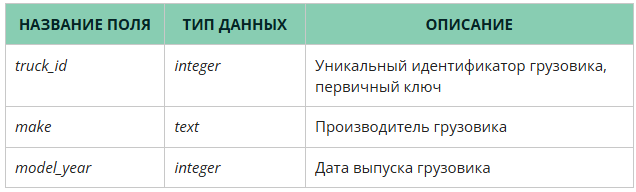

Последняя таблица в датасете, shipment, — таблица с данными непосредственно о доставках. Она описывает взаимодействие всех перечисленных сущностей, а потому содержит наибольшее количество ссылок на другие таблицы.

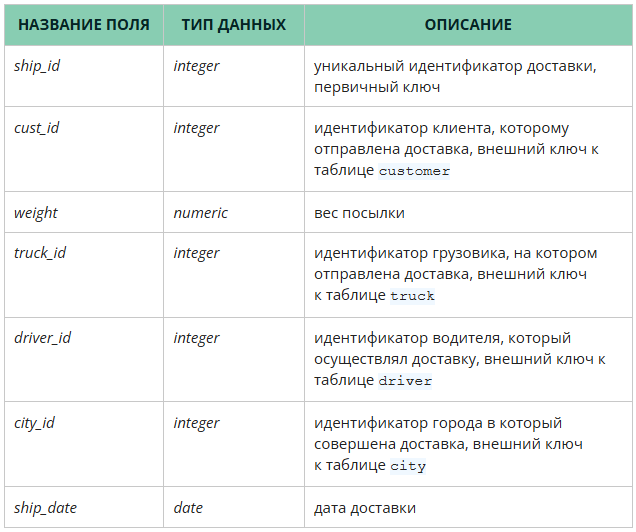

✍ Исследуйте датасет самостоятельно и ответьте на вопросы ниже ↓

# Принцип и условия работы Union

✍ Вернёмся к центральному вопросу модуля: как соединить несколько результатов, чтобы получить в выводе один общий?

Чтобы разобраться в этом вопросе, смоделируем ситуацию.

Допустим, мы хотим собрать из справочников по книгам и фильмам один, так чтобы в нём содержались названия произведений, а также их описание — книга или фильм.

Для этого напишем простой запрос:

In [ ]:
SELECT          book_name object_name, 'книга' object_description 
FROM          public.books
UNION ALL
SELECT          movie_title, 'фильм' 
FROM          sql.kinopoisk

In [ ]:
SELECT book_name object_name, 'книга' object_descritption /*выбираем столбец с названием book_name, задаём алиас для столбца object_name, задаём во второй колонке объект ‘книга’ с алиасом для столбца object_descritption*/
FROM public.books /*из схемы public и таблицы books*/
UNION ALL /*оператор присоединения*/
SELECT movie_title, 'фильм' /*выбираем столбец movie_title, сами задаём во второй колонке объект ‘фильм’*/
FROM sql.kinopoisk /*из схемы sql и таблицы kinopoisk*/

Визуально произведённое нами действие можно представить следующим образом:

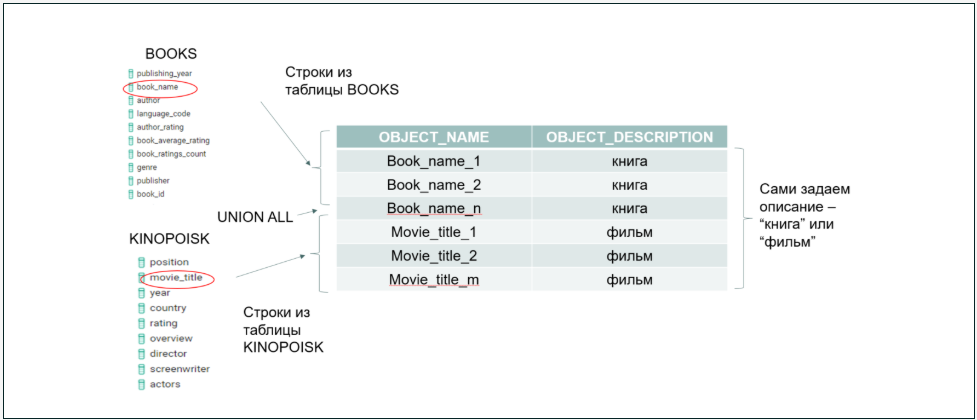

Общий принцип мы поняли, разберёмся в деталях:



В запросе мы использовали оператор UNION ALL — он присоединяет любой результат запроса к другому «снизу» при условии, что у них одинаковая структура, а именно:

- одинаковый тип данных;


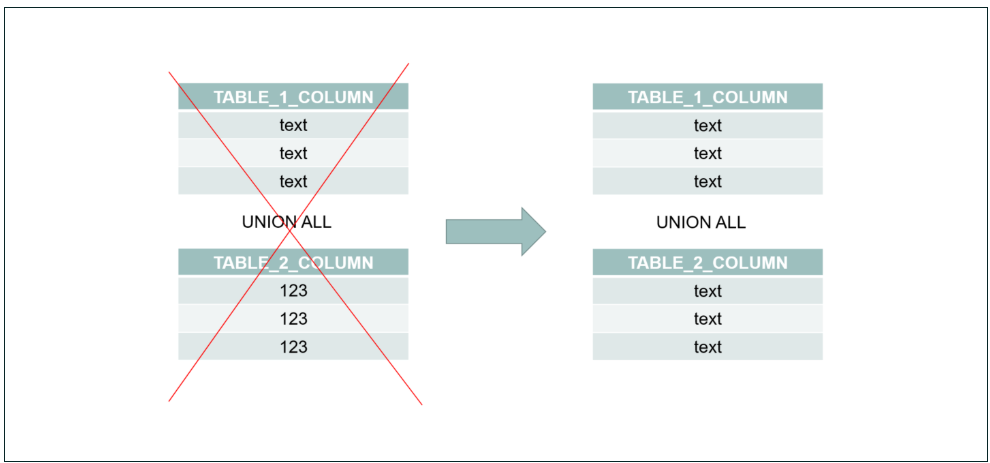

- одинаковое количество столбцов;

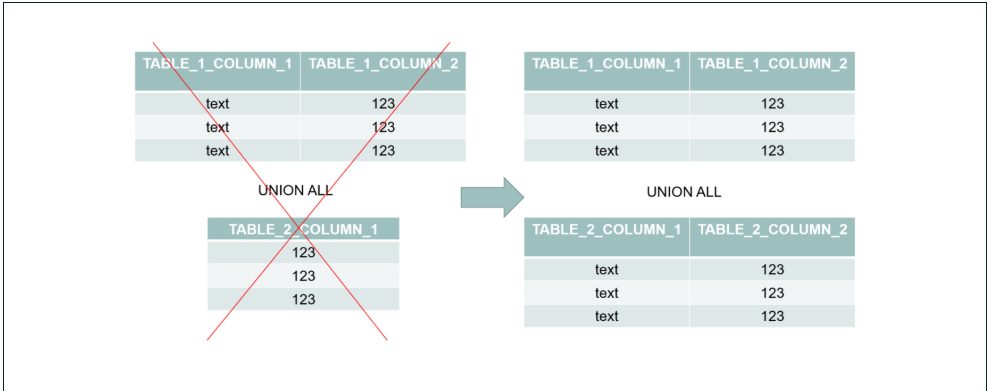

- одинаковый порядок столбцов согласно типу данных.

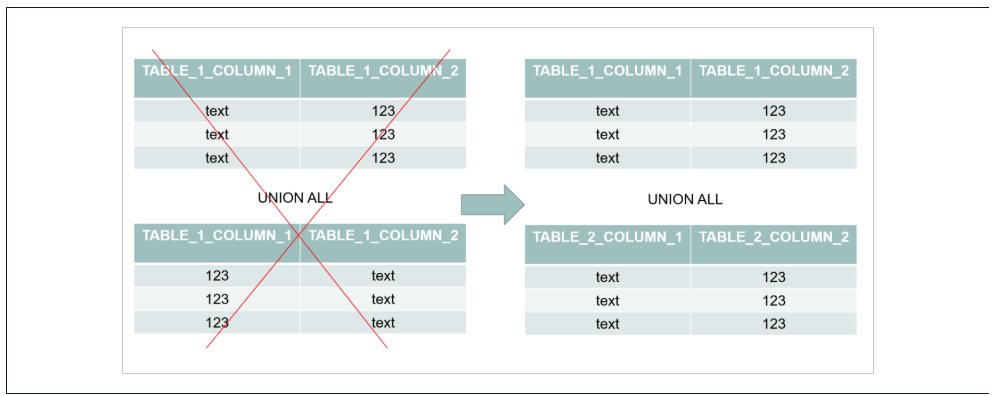

### Виды UNION

Оператор присоединения существует в двух вариантах:

- UNION выводит только уникальные записи;
- UNION ALL присоединяет все строки последующих таблиц к предыдущим, без ограничений по уникальности.

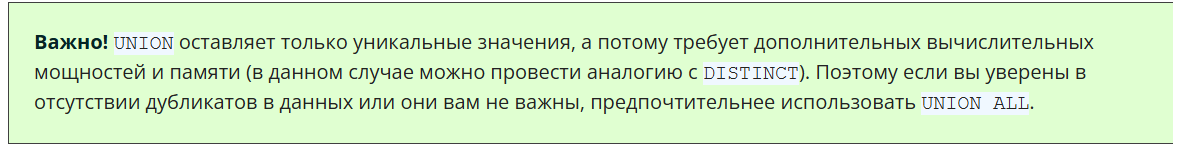

Проверить, как различаются операторы, вы сможете при выполнении заданий 2.1 и 3.1.

### Синтаксис

Запрос строится таким образом:

In [ ]:
SELECT         n columns
FROM 
         table_1
UNION ALL
SELECT 
         n columns
FROM 
         table_2
...
UNION ALL
SELECT 
         n columns
FROM 
         table_n

Результатом выполнения такого запроса будут строки table_1, table_2, ..., table_n, соединённые одни под другими и выведенные в единой выдаче.

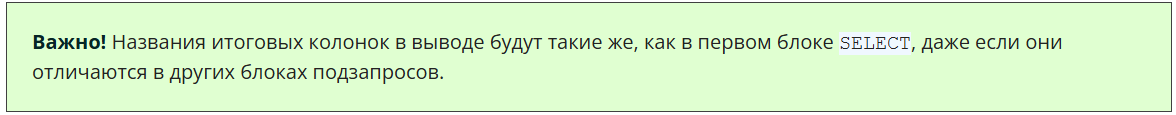

Пришла пора испытать функцию UNION(ALL) на практике.

Обратимся к нашему датасету о транспортной компании и посмотрим, как сформировать справочник с ID всех таблиц и указанием объекта, к которому он относится.

In [ ]:
SELECT
         c.city_id object_name, 'id города' object_type
FROM 
         sql.city c
UNION ALL
SELECT
         d.driver_id other_name, 'id водителя' other_type
FROM 
         sql.driver d
UNION ALL
SELECT
         s.ship_id, 'id доставки'
FROM 
         sql.shipment s
UNION ALL
SELECT
         c.cust_id, 'id клиента'
FROM 
         sql.customer c
UNION ALL
SELECT
         t.truck_id, 'id грузовика'
FROM 
         sql.truck t
ORDER BY 1

In [ ]:
SELECT
         c.city_id object_name,  'id города' object_type /*выбираем колонку city_id и задаём ей алиас object_name, сами задаём объект 'id города' и название столбца object_type*/
FROM 
         sql.city c /*из схемы sql и таблицы city, задаём алиас таблице — с*/
UNION ALL /*оператор присоединения*/
SELECT
         d.driver_id other_name,  'id водителя' other_type /*выбираем колонку driver_id и задаём ей алиас other_name, сами задаём объект 'id водителя' и название столбца other_type*/
FROM 
         sql.driver d  /*из схемы sql и таблицы driver, задаём алиас таблице — d*/
UNION ALL /*оператор присоединения*/
SELECT
         s.ship_id,  'id доставки' /*выбираем колонку ship_id, сами задаём объект 'id доставки'*/
FROM 
         sql.shipment s /*из схемы sql и таблицы shipment, задаём алиас таблице — s*/
UNION ALL /*оператор присоединения*/
SELECT
         c.cust_id,  'id клиента' /*выбираем колонку cust_id, сами задаём объект 'id клиента'*/
FROM 
         sql.customer c /*из схемы sql и таблицы customer, задаём алиас таблице — c*/
UNION ALL /*оператор присоединения*/
SELECT
         t.truck_id,  'id грузовика' /*выбираем колонку truck_id, сами задаём объект 'id грузовика'*/
FROM 
         sql.truck t /*из схемы sql и таблицы truck, задаём алиас таблице — t*/
ORDER BY 1 /*сортировка по первому столбцу*/

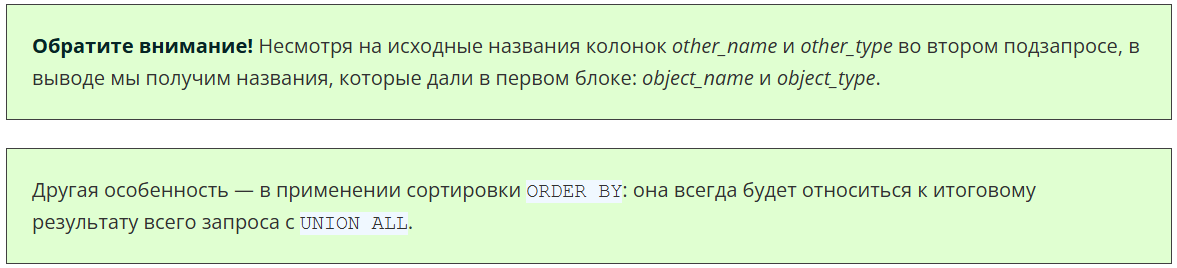

В случаях, когда необходимо применить команду ORDER BY или LIMIT не к итоговому результату, а к каждой части запроса, можно обернуть подзапросы в скобки.

Чтобы посмотреть, как это работает, вернёмся к нашему примеру с общим справочником по фильмам и книгам.

Мы уже знаем, что можно легко и непринуждённо применить операторы ORDER BY и LIMIT ко всему результату запроса.

In [ ]:
SELECT book_name object_name, 'книга' object_descritption 
FROM public.books
UNION ALL
SELECT movie_title, 'фильм' 
FROM sql.kinopoisk
ORDER BY 1
LIMIT 1

Всё бы хорошо, только в таком случае отсортирован будет весь общий справочник, а в выводе останется одна строка с названием объекта, идущим первым по алфавиту.

А если мы не хотим общую сортировку? Может, нам нужны строки с названием как фильма, так и книги, идущих первыми по алфавиту.

Нет ничего проще — отсортируем каждую часть запроса по отдельности и объединим результаты!

Просто добавим ORDER BY и LIMIT ещё и в первую часть запроса:

In [ ]:
SELECT book_name object_name, 'книга' object_descritption 
FROM public.books
ORDER BY 1
LIMIT 1
UNION ALL
SELECT movie_title, 'фильм' 
FROM sql.kinopoisk
ORDER BY 1
LIMIT 1

Вместо результата получим сообщение о синтаксической ошибке: "...syntax error at or near "UNION"..." Очевидно, этот фокус не удался.

Не стоит огорчаться, ведь проблему можно решить одним (ну, почти) движением руки — просто добавив скобки вокруг каждой из частей запроса.

In [ ]:
(SELECT book_name object_name, 'книга' object_descritption 
FROM public.books
ORDER BY 1
LIMIT 1)
UNION ALL
(SELECT movie_title, 'фильм' 
FROM sql.kinopoisk
ORDER BY 1
LIMIT 1)

Отлично! Мы получили именно то, что хотели.

Напишите запрос, который создает уникальный алфавитный справочник всех городов, штатов, имён водителей и производителей грузовиков. Результатом запроса должны быть два столбца: название и тип объекта (city, state, driver, truck). Отсортируйте список по названию объекта, а затем — по типу.

In [ ]:
SELECT city_name AS object_name, 'city' AS object_type
FROM sql.city
UNION
SELECT state AS object_name, 'state' AS object_type
FROM sql.city
UNION
SELECT first_name AS object_name, 'driver' AS object_type
FROM sql.driver
UNION
SELECT make AS object_name, 'truck' AS object_type
FROM sql.truck
ORDER BY object_name, object_type;

Напишите запрос, который соберёт имена всех упомянутых городов и штатов из таблицы city. Результатом запроса должен быть один столбец object_name, отсортированный в алфавитном порядке.

In [ ]:
SELECT city_name AS object_name
FROM sql.city
UNION ALL
SELECT state AS object_name
FROM sql.city
ORDER BY object_name;

Выполнив предыдущий запрос, мы получили города с одинаковыми названиями, но находящиеся в разных штатах, а также большое количество дублирующихся названий штатов. Перепишите предыдущий запрос так, чтобы остались только уникальные названия городов и штатов. Результатом запроса должен быть один столбец object_name, отсортированный в алфавитном порядке.

In [ ]:
SELECT city_name AS object_name
FROM sql.city
UNION ALL
SELECT state AS object_name
FROM sql.city
ORDER BY object_name;

# 3. UNION и ограничение типов данных

### Почему так важен тип данных?

Как мы уже знаем, UNION может быть использован только в случае полного соответствия столбцов и их типов в объединяемых запросах.

Допустим, мы хотим вывести список всех id городов и их названий в одном столбце.

Давайте напишем запрос, который позволит получить нужный нам результат.

In [ ]:
SELECT 
         c.city_id
FROM
         sql.city c
UNION ALL
SELECT 
         cc.city_name
FROM
         sql.city cc

In [ ]:
SELECT 
         c.city_id /*выбираем столбец city_id*/
FROM
         sql.city c /*из схемы sql  и таблицы city, задаём таблице алиас с*/ 

UNION ALL /*оператор присоединения*/

SELECT 
         cc.city_name /*выбираем столбец city_name*/
FROM
         sql.city cc /*из схемы sql и таблицы city, задаём таблице алиас сс*/

Вместо результата вы получите сообщение об ошибке: "ERROR: UNION types integer and text cannot be matched". Дело в том, что мы попытались объединить числовой и строковый типы в одной колонке, а это невозможно.

Если мы всё же хотим выполнить поставленную задачу, придётся привести оба столбца к одному типу данных. Не каждый текст может быть приведён к числу, зато каждое число может быть представлено в текстовом формате.

Забегая вперёд, скажем пару слов о типизации столбцов. Для типизации в Postgres составляется запрос по модели column_name::column_type

Таким образом, чтобы перевести city_id в текст, нам потребуется написать city_id::text.

Важно! Любой тип данных может быть приведён к текстовому формату — эту возможность целесообразно использовать для соединения разнородных сущностей. Главное — помнить, что сортировка текста отличается от сортировки чисел и дат.

Немного подправим запрос, чтобы получить желаемый результат.

In [ ]:
SELECT 
         c.city_id::text
FROM
         sql.city c
UNION ALL
SELECT 
         cc.city_name
FROM
         sql.city cc

In [ ]:
SELECT 
         c.city_id::text /*выбираем столбец city_id, переводим city_id из числового в текстовый формат*/
FROM
         sql.city c /*из схемы sql  и таблицы city, задаём таблице алиас с*/

UNION ALL /*оператор присоединения*/

SELECT 
         cc.city_name /*выбираем столбец city_name*/
FROM
         sql.city cc /*из схемы sql и таблицы city, задаём таблице алиас сс*/

Напишите запрос, который объединит в себе все почтовые индексы водителей и их телефоны в единый столбец-справочник contact. Также добавьте столбец с именем водителя first_name и столбец contact_type с типом контакта (phone или zip в зависимости от типа). Отсортируйте список по столбцу с контактными данными в порядке возрастания, а затем — по имени водителя.

In [ ]:
SELECT zip_code::text AS contact, first_name, 'zip' AS contact_type
FROM sql.driver
UNION ALL
SELECT phone::text AS contact, first_name, 'phone' AS contact_type
FROM sql.driver
ORDER BY contact, first_name;

# 4. UNION ALL и промежуточные итоги

### Возможности UNION

✍ Помимо соединения разнородных сущностей в единый справочник, UNION ALL часто используется для подведения промежуточных итогов и выведения результатов агрегатных функций.

Кроме агрегатных функций, в запросах с UNION могут использоваться функции группировки и выборки.



Попробуем вывести обобщённые данные о населении по всем городам, с детализацией до конкретного города.

In [ ]:
SELECT
         c.city_name,
         c.population
FROM
         sql.city c
UNION ALL
SELECT
         'total',
         SUM(c.population)
FROM
         sql.city c
ORDER BY 2 DESC

In [ ]:
SELECT
         c.city_name,
         c.population /*выбираем столбцы city_name, population*/
FROM
         sql.city c /*из схемы sql и таблицы city, задаём таблице алиас с*/

UNION ALL /*оператор присоединения*/

SELECT
         'total',
         SUM(c.population) /*сами задаём объект ‘total’, суммируем все значения столбца population*/
FROM
         sql.city c /*из схемы sql и таблицы city, задаём таблице алиас с*/
ORDER BY 2 DESC /*сортируем по второму столбцу в убывающем порядке (чтобы итоговая сумма была в начале)*/

Визуально это действие можно представить так:

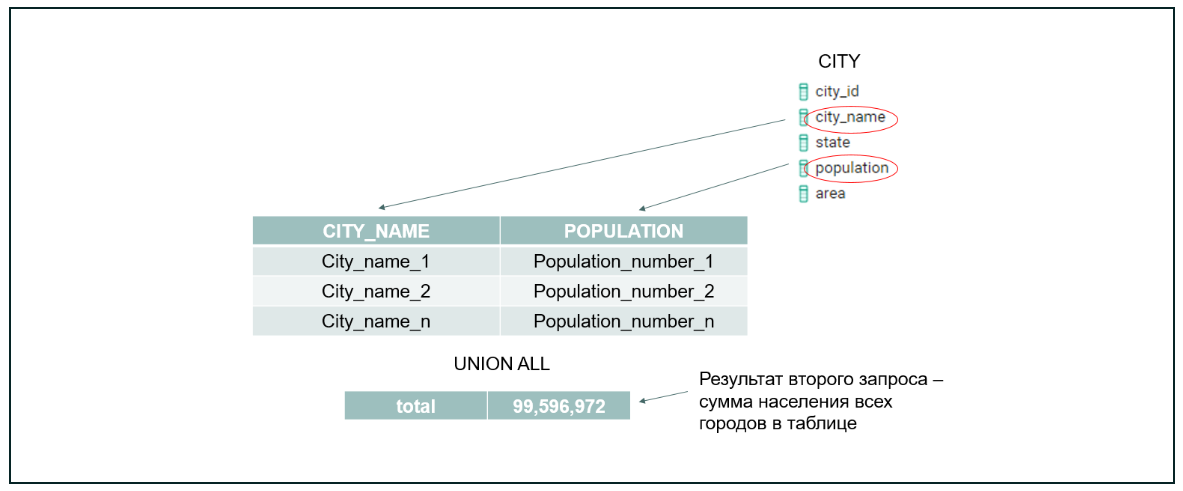

Выполнив запрос в Metabase, вы заметите, что сначала выведен итоговый результат с суммой населения всех городов в таблице, а затем по каждому городу в отдельности.

Напишите запрос, который выводит общее число доставок total_shipments, а также количество доставок в каждый день. Необходимые столбцы: date_period, cnt_shipment. Не забывайте о единой типизации. Упорядочите по убыванию столбца date_period.

In [ ]:
SELECT 
    'total_shipments' AS date_period, 
    COUNT(*) AS cnt_shipment
FROM sql.shipment
UNION ALL
SELECT 
    ship_date::text AS date_period, 
    COUNT(*) AS cnt_shipment
FROM sql.shipment
GROUP BY ship_date
ORDER BY date_period DESC;

# 5. UNION и дополнительные условия

✍ UNION также может быть использован для разделения существующей выборки по критерию «выполнение определённого условия».

Например, с помощью UNION можно отобразить, у кого из водителей заполнен столбец с номером телефона.

In [1]:
SELECT
         d.first_name,
         d.last_name,
         'телефон заполнен' phone_info
FROM
         sql.driver d
WHERE d.phone IS NOT NULL

UNION

SELECT
         d.first_name,
         d.last_name,
         'телефон не заполнен' phone_info
FROM
         sql.driver d
WHERE d.phone IS NULL

IndentationError: unexpected indent (3090992793.py, line 2)

In [ ]:
SELECT
         d.first_name,
         d.last_name,
         'телефон заполнен' phone_info /*выбираем столбцы first_name, last_name, сами выводим объект ‘телефон заполнен’*/
FROM
         sql.driver d /*из схемы sql и таблицы driver, задаём алиас d*/
WHERE d.phone IS NOT NULL /*условие, что телефон заполнен*/

UNION /*оператор присоединения (уникальные значения)*/

SELECT
         d.first_name,
         d.last_name,
         'телефон не заполнен' phone_info /*выбираем столбцы first_name, last_name, сами выводим объект ‘телефон не заполнен’*/
FROM
         sql.driver d /*из схемы sql и таблицы driver, задаём алиас d*/
WHERE d.phone IS NULL /*условие, что телефон не заполнен*/

Напишите запрос, который выведет все города и штаты, в которых они расположены, а также информацию о том, была ли осуществлена доставка в этот город:

- если в город была осуществлена доставка, то выводим 'доставка осуществлялась';
- если нет — выводим 'доставка не осуществлялась'.

Столбцы к выводу: city_name, state, shipping_status. Отсортируйте в алфавитном порядке по городу, а затем — по штату.

In [ ]:
SELECT 
    c.city_name, 
    c.state, 
    CASE 
        WHEN EXISTS (
            SELECT 1 
            FROM sql.shipment s 
            WHERE s.city_id = c.city_id
        ) THEN 'доставка осуществлялась'
        ELSE 'доставка не осуществлялась'
    END AS shipping_status
FROM sql.city c
ORDER BY c.city_name, c.state;

Напишите запрос, который выводит два столбца: city_name и shippings_fake. Выведите города, куда совершались доставки. Пусть первый столбец содержит название города, а второй формируется так:

- если в городе было более десяти доставок, вывести количество доставок в этот город как есть;
- иначе — вывести количество доставок, увеличенное на пять.

Отсортируйте по убыванию получившегося «нечестного» количества доставок, а затем — по имени в алфавитном порядке.

In [ ]:
SELECT 
    c.city_name,
    CASE 
        WHEN COUNT(s.ship_id) > 10 THEN COUNT(s.ship_id)
        ELSE COUNT(s.ship_id) + 5
    END AS shippings_fake
FROM sql.city c
JOIN sql.shipment s ON c.city_id = s.city_id
GROUP BY c.city_name
ORDER BY shippings_fake DESC, c.city_name;

# 6. UNION и ручная генерация

✍ UNION можно использовать для создания справочников прямо в коде запроса. К примеру, если мы хотим вручную ввести какие-то значения и произвести с ними некоторые манипуляции или дополнить существующую выдачу своими значениями.

Составим запрос, который позволит вывести первые три буквы алфавита и их порядковые номера.

In [ ]:
SELECT 
         'a' letter,'1' ordinal_position
UNION 
SELECT 
         'b','2'
UNION 
SELECT
         'c','3'

In [ ]:
SELECT 
         'a' letter,'1' ordinal_position /*сами задаём значение первого столбца ‘a’ и алиас для него letter, значение второго столбца ‘1’ и алиас для него ordinal_position*/
         
UNION /*оператор присоединения*/
SELECT 
         'b','2' /*сами задаём значение первого столбца ‘b’, значение второго столбца ‘2’ */
         
UNION /*оператор присоединения*/

SELECT
         'c','3' /*сами задаём значение первого столбца ‘с’, значение второго столбца ‘3’*/ 

Существуют сложные алгоритмы сравнения текстовых значений, но главный смысл сводится к одному: сравнение производится на основе таблицы unicode и позиции элемента в ней с учётом определённых условий.

✍ Упражнения ниже помогут увидеть разницу в сравнении числовых и текстовых значений ↓

Напишите запрос, который выберет наибольшее из числовых значений:

- 1000000;
- 541;
- -500;
- 100.
Столбец с результатом назовите result.

In [ ]:
SELECT MAX(val) AS result
FROM (
    SELECT 1000000 AS val
    UNION ALL
    SELECT 541
    UNION ALL
    SELECT -500
    UNION ALL
    SELECT 100
) AS numbers;

Помним, что сортировка для числовых и строковых типов данных отличается. Построив запрос по аналогии с примером, приведите значения к текстовому типу данных, сравните и выберите наибольшее из них:

- 1000000;
- 541;
- -500;
- 100.
Столбец с ответом назовите mycol

In [ ]:
SELECT MAX(val) AS result
FROM (
    SELECT 1000000::text AS val
    UNION ALL
    SELECT 541::text
    UNION ALL
    SELECT '-500'::text
    UNION ALL
    SELECT 100::text
) AS mycol;

остроив запрос по аналогии с примером, найдите самое большое значение из перечисленных операторов:

- '+' ;
- '-' ;
- '=' ;
- '/' .

Столбец с ответом назовите result.

In [ ]:
SELECT MAX(val) AS result
FROM (
    SELECT '+' AS val
    UNION ALL
    SELECT '-' 
    UNION ALL
    SELECT '=' 
    UNION ALL
    SELECT '/' 
) AS operators;

# 7. EXCEPT

### Исключаем повторяющиеся данные

Предположим, нам нужно узнать, в какие города осуществлялась доставка, за исключением тех, в которых проживают водители.

In [ ]:
SELECT
         c.city_name
FROM
         sql.shipment s
JOIN sql.city c ON s.city_id = c.city_id
EXCEPT
SELECT
         cc.city_name
FROM
         sql.driver d 
JOIN sql.city cc ON d.city_id=cc.city_id
ORDER BY 1

In [ ]:
SELECT
         c.city_name /*выбираем столбец city_name*/
FROM
         sql.shipment s /*из схемы sql и таблицы shipment, задаём таблице алиас s*/
JOIN sql.city c ON s.city_id = c.city_id /*внутреннее присоединение из схемы sql таблицы city, задав ей алиас c, по ключам city_id*/
EXCEPT /*оператор присоединения*/
SELECT
         cc.city_name  /*выбираем столбец city_name*/
FROM
         sql.driver d /*из схемы sql и таблицы driver, задаём таблице алиас d*/
JOIN sql.city cc ON d.city_id=cc.city_id /*внутреннее присоединение из схемы sql таблицы city, задав ей алияс cc, по ключам city_id*/
ORDER BY 1 /*сортировка по первому столбцу*/

Все водители проживают в городе Memphis, и мы видим, что он не выводится в результате запроса.

Как вы, должно быть, заметили, для решения этой задачи мы использовали оператор EXCEPT. Принципы его работы мы сейчас разберём ↓

Чтобы лучше понять данный тип присоединения, предлагаем ознакомиться с диаграммой Венна — математическим инструментом, представляющим возможные логические связи между соединёнными наборами данных.

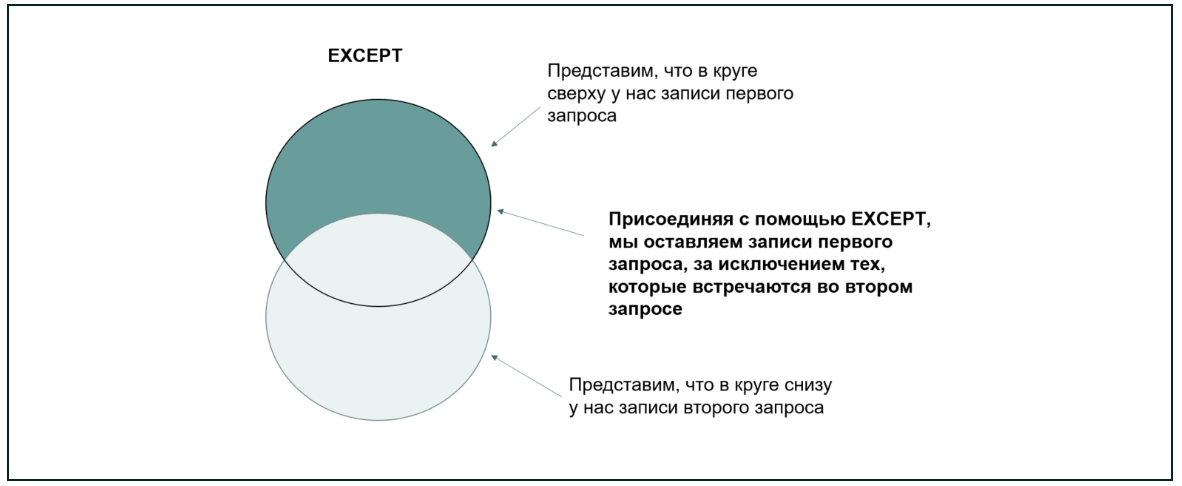

Синтаксические правила для оператора EXCEPT такие же, как и для UNION:

- одинаковый тип данных;
- одинаковое количество столбцов;
- одинаковый порядок столбцов согласно типу данных.

Синтаксис выглядит следующим образом:

In [ ]:
SELECT 
         n columns
FROM 
         table_1
EXCEPT
SELECT 
         n columns
FROM 
         table_2

Мы уже знаем, как решить такую задачу с использованием LEFT JOIN. Вариант с EXCEPT будет полезен в тех случаях, когда у вас много столбцов и вам не хочется прописывать их равенство в условии для JOIN.

Предположим, у нас есть информация о продажах канцелярского магазина за май и июнь.

Какие-то позиции продавались и в том, и в другом месяце, а какие-то — только в одном. Использовав EXCEPT, мы можем оставить только те товары, которые есть в первом запросе (например, за май), но отсутствуют во втором запросе (например, за июнь).

Графически действие оператора можно представить следующим образом:

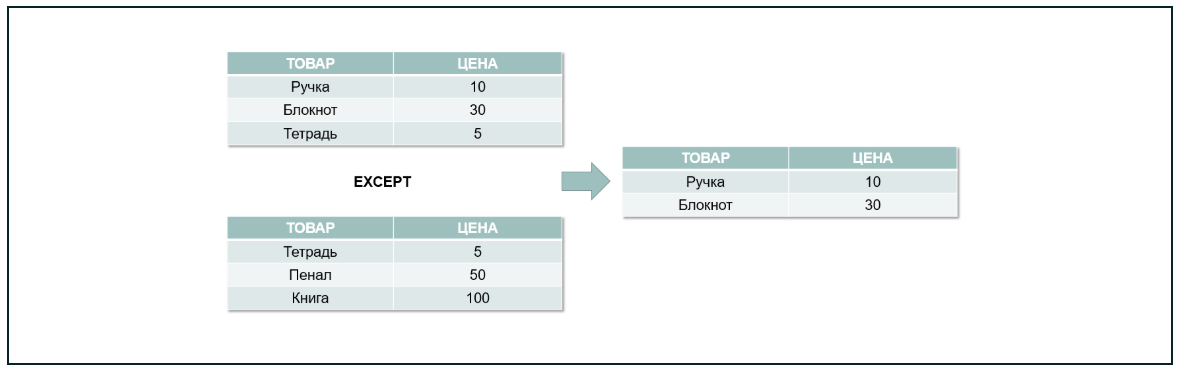

Таким образом, при присоединении с помощью EXCEPT мы вывели только те товары, которые были проданы в мае, но не в июне. Чтобы найти продажи по тем позициям, что были реализованы в июне, а в мае — нет, необходимо поменять запросы местами.

Выведите список zip-кодов, которые есть в таблице sql.driver, но отсутствуют в таблице sql.customer. Отсортируйте по возрастанию, столбец к выводу — zip. В поле ниже введите запрос, с помощью которого вы решили эту задачу.

In [ ]:
SELECT zip_code AS zip
FROM sql.driver
EXCEPT
SELECT zip
FROM sql.customer
ORDER BY zip;

# 8. INTERSECT

### Выбираем общие данные

А что если нам надо вывести общие записи — те, что существуют в нескольких таблицах?

Предположим, нам надо вывести совпадающие по названию города и штаты.

In [ ]:
SELECT          c.city_name object_name
FROM          sql.city c
INTERSECT
SELECT 
         cc.state
FROM          sql.city cc
ORDER BY 1

In [ ]:
SELECT 
         c.city_name object_name /*выбираем столбец city_name, задаём ему алиас object_name*/
FROM 
         sql.city c /*из схемы sql и таблицы city, задаём таблице алиас с*/

INTERSECT /*оператор присоединения*/

SELECT 
         cc.state /*выбираем столбец state*/
FROM 
         sql.city cc /*из схемы sql и таблицы city, задаём таблице алиас с*/
ORDER BY 1

Как видим, с помощью оператора INTERSECT мы вывели названия городов и штатов, которые совпадают: New York, Washington и Wyoming. Присмотримся к нему внимательнее.

Чтобы лучше понять, как работает этот оператор, вновь обратимся к диаграмме Венна: INTERSECT оставляет из результатов первого запроса все строки, которые совпали с результатом выполнения второго запроса.

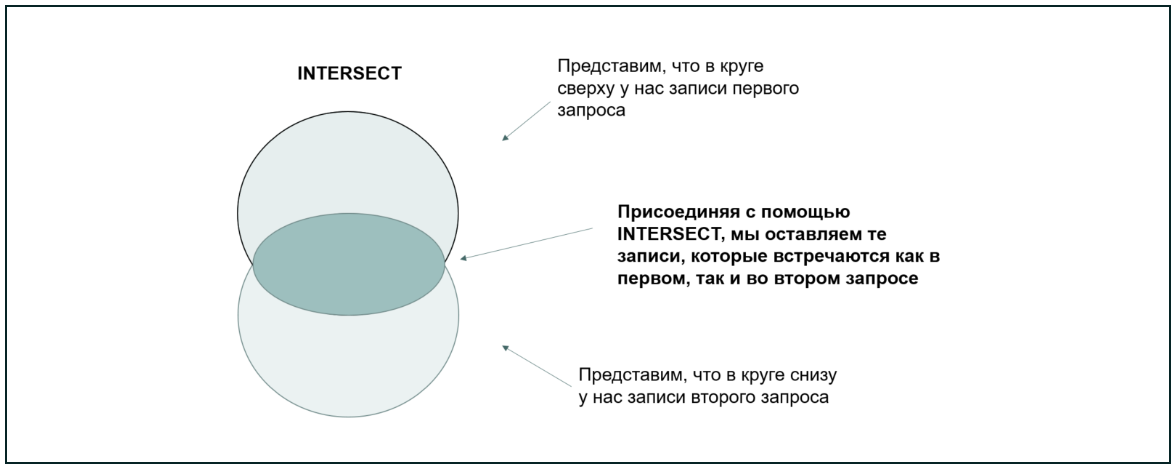

Синтаксис запроса с оператором INTERSECT выглядит следующим образом:

In [ ]:
SELECT 
         n columns
FROM 
         table_1
INTERSECT
SELECT 
         n columns
FROM 
         table_2

Вернёмся к нашему примеру с продажами канцтоваров.

С помощью оператора INTERSECT мы можем вывести те позиции, которые продавались и в мае, и в июне. Визуализировать это действие можно примерно так:

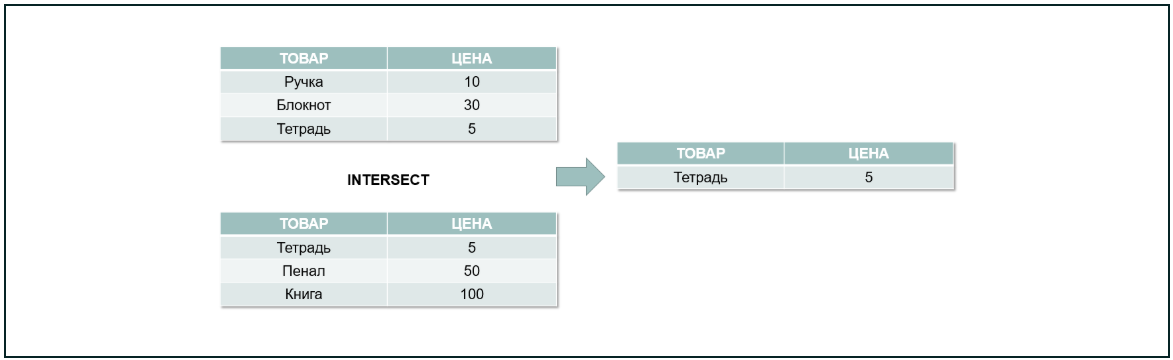

Оператор INTERSECT оставляет только те строки, которые являются общими для двух запросов (в нашем примере это Тетрадь).

Как EXCEPT, так и INTERSECT убирают дубликаты, если они имеются.

Напишите запрос, который выведет список id городов, в которых есть и клиенты, и доставки, и водители.

In [ ]:
SELECT city_id
FROM sql.city
INTERSECT
SELECT city_id
FROM sql.customer
INTERSECT
SELECT city_id
FROM sql.shipment
INTERSECT
SELECT city_id
FROM sql.driver
ORDER BY city_id;

Выведите zip-код, который есть как в таблице с клиентами, так и в таблице с водителями.

In [ ]:
SELECT zip
FROM sql.customer
INTERSECT
SELECT zip_code
FROM sql.driver
ORDER BY zip;

#  9. Итоги. Закрепление знаний

✍ В этом модуле вы освоили ещё несколько возможностей из функционала SQL.

Теперь вы умеете:

- присоединять таблицы «снизу», одну под другой;
- исключать или, наоборот, выбирать повторяющиеся записи из двух таблиц;
- вручную добавлять записи в таблицу.

Запишем структуру запроса с учётом полученных знаний.

In [ ]:
SELECT          N columns
FROM          table_1
UNION / UNION ALL / EXCEPT / INTERSECT 
SELECT          N columns
FROM          table_2

### Дополнительные сведения

Напоследок разберём несколько вопросов, которые часто задают на собеседованиях ↓

✍ Теперь осталось только проверить, насколько хорошо вы усвоили материал ↓

Выведите города с максимальным и минимальным весом единичной доставки. Столбцы к выводу — city_name, weight.

In [ ]:
SELECT city_name, weight
FROM sql.shipment
JOIN sql.city ON sql.shipment.city_id = sql.city.city_id
WHERE weight = (SELECT MAX(weight) FROM sql.shipment)
    OR weight = (SELECT MIN(weight) FROM sql.shipment)
ORDER BY weight DESC;

Выведите идентификационные номера клиентов (cust_id), которые совпадают с идентификационными номерами доставок (ship_id). Столбец к выводу — mutual_id. Отсортируйте по возрастанию.

In [ ]:
SELECT cust_id AS mutual_id
FROM sql.customer
INTERSECT
SELECT ship_id
FROM sql.shipment
ORDER BY mutual_id;

Создайте справочник, содержащий уникальные имена клиентов, которые являются производителями (cust_type='manufacturer'), и производителей грузовиков, а также описание объекта — 'КЛИЕНТ' или 'ГРУЗОВИК'. Столбцы к выводу — object_name, object_description. Отсортируйте по названию в алфавитном порядке.

In [ ]:
SELECT 
    cust_name AS object_name, 
    'КЛИЕНТ' AS object_description
FROM sql.customer
WHERE cust_type = 'manufacturer'
UNION
SELECT 
    make AS object_name, 
    'ГРУЗОВИК' AS object_description
FROM sql.truck
ORDER BY object_name;

### И это ещё не всё!

Знания по темам этого модуля зачастую проверяют работодатели на собеседованиях. Предлагаем вам ознакомиться с вопросами, с которыми вы можете столкнуться при поиске работы. 

Важно! Это задания на самопроверку, они необязательные и мы не будем оценивать качество их решения. На некоторые вопросы будет предоставляться ответ, а на некоторые — нет. Настоятельно рекомендуем вам попробовать найти ответ самостоятельно, прежде чем открывать его.

# *10. Дополнительные задачи по SQL

✍ Для поддержания формы предлагаем вам периодически решать задачи с использованием SQL.

Мы подготовили отдельный курс с практическими заданиями по SQL: они составлены так, чтобы максимально приблизить вас к реальным задачам.

Чтобы записаться на курс, достаточно заполнить форму.